#Criando os Nomes

In [112]:
import pandas as pd

In [113]:
#Reading file .json
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [114]:
# Random Sample
# nomes_f.sample(5)
# nomes_m.sample(5)

print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [115]:
frames = [nomes_f, nomes_m]

In [116]:
# Concat Dfs
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
60,JEFERSON
63,MIGUEL
110,IVAN
99,WILLIAN
148,APARECIDO


# Incluindo ID dos alunos

In [117]:
import numpy as np
np.random.seed(123)

In [118]:
total_alunos = len(nomes)
total_alunos

400

In [119]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [120]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [121]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

# Criando Cursos

In [122]:
!pip3 install html5lib
!pip3 install lxml

In [123]:
import html5lib

In [124]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos = cursos[0]

# Alterando o index de cursos

In [125]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nomes_do_curso'})

In [126]:
cursos['id'] = cursos.index + 1

In [127]:
cursos = cursos.set_index('id')

# Matrículando Alunos

In [128]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)*1.5).astype(int)

In [129]:
nomes.matriculas.describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [130]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


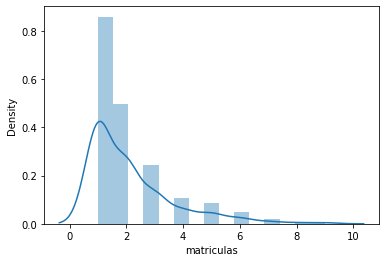

In [131]:
sns.distplot(nomes.matriculas)

In [132]:
nomes.matriculas.value_counts()

1    183
2    106
3     52
4     23
5     18
6     10
7      4
9      2
8      2
Name: matriculas, dtype: int64

# Selecionando cursos

In [133]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [134]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas

  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p =  prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [135]:
matriculas.head()

,id_aluno,id_curso
0,235,11
1,235,11
2,235,2
3,43,13
4,304,10


In [136]:
matriculas.groupby('id_curso').count().join(cursos['nomes_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nomes_do_curso
id_curso,,
1,8,Lógica de programação
2,81,Java para Web
3,18,C# para Web
4,17,Ruby on Rails
5,24,Cursos de Python
6,68,PHP com MySql
7,4,.NET para web
8,54,Novas integrações com Java
9,68,TDD com Java


In [137]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
141,ORLANDO,159,@servicodoemail.com,orlando@servicodoemail.com,3
86,MAURO,251,@dominiodoemail.com.br,mauro@dominiodoemail.com.br,4
124,CESAR,2,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,6


In [138]:
cursos.head()

,nomes_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [139]:
matriculas.head()

,id_aluno,id_curso
0,235,11
1,235,11
2,235,2
3,43,13
4,304,10


In [140]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nomes_do_curso']).rename(columns = {'id_aluno' : 'quantidade_de_alunos'})

In [141]:
matriculas_por_curso.head()

,quantidade_de_alunos,nomes_do_curso
id_curso,,
1,8,Lógica de programação
2,81,Java para Web
3,18,C# para Web
4,17,Ruby on Rails
5,24,Cursos de Python


# Exportando em diferentes formatos

In [142]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [143]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nomes_do_curso
0,8,Lógica de programação
1,81,Java para Web
2,18,C# para Web
3,17,Ruby on Rails
4,24,Cursos de Python
5,68,PHP com MySql
6,4,.NET para web
7,54,Novas integrações com Java
8,68,TDD com Java
9,48,Código limpo com C#


In [144]:
matriculas_json = matriculas_por_curso.to_json()

In [145]:
matriculas_html = matriculas_por_curso.to_html()

# Criando o Banco SQL

In [146]:
!pip install sqlalchemy

In [147]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [159]:
engine = create_engine('sqlite:///:memory:')

In [149]:
engine

Engine(sqlite:///:memory:)

In [150]:
type(engine)

sqlalchemy.engine.base.Engine

In [152]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


In [160]:
matriculas_por_curso.to_sql('matriculas', engine)

In [161]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do Banco SQL

In [162]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [163]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nomes_do_curso
0,1,8,Lógica de programação
1,3,18,C# para Web
2,4,17,Ruby on Rails
3,7,4,.NET para web
4,12,12,Hardware básico


In [164]:
pd.read_sql_table('matriculas', engine, columns = ['nomes_do_curso', 'quantidade_de_alunos'])

,nomes_do_curso,quantidade_de_alunos
0,Lógica de programação,8
1,Java para Web,81
2,C# para Web,18
3,Ruby on Rails,17
4,Cursos de Python,24
5,PHP com MySql,68
6,.NET para web,4
7,Novas integrações com Java,54
8,TDD com Java,68
9,Código limpo com C#,48


In [165]:
 todas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nomes_do_curso', 'quantidade_de_alunos'])

In [166]:
todas_matriculas = todas_matriculas.query('quantidade_de_alunos > 70')

In [167]:
todas_matriculas

,nomes_do_curso,quantidade_de_alunos
1,Java para Web,81
15,Estatística básica,71
17,Programação funcional,79


# Escrevendo no Banco SQL

In [168]:
todas_matriculas.to_sql('todas_matriculas', con = engine)

In [169]:
print(engine.table_names())

['matriculas', 'todas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos Alunos da Próxima Turma

In [170]:
matriculas_por_curso

,quantidade_de_alunos,nomes_do_curso
id_curso,,
1,8,Lógica de programação
2,81,Java para Web
3,18,C# para Web
4,17,Ruby on Rails
5,24,Cursos de Python
6,68,PHP com MySql
7,4,.NET para web
8,54,Novas integrações com Java
9,68,TDD com Java


In [175]:
id_curso = 1
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
79,338,1
132,278,1
248,106,1
264,20,1
326,182,1
513,364,1
548,183,1
846,84,1


In [176]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
338,1,DEBORA,@dominiodoemail.com.br,debora@dominiodoemail.com.br,1
278,1,SILVANA,@servicodoemail.com,silvana@servicodoemail.com,4
106,1,LIVIA,@servicodoemail.com,livia@servicodoemail.com,6
20,1,BENEDITA,@servicodoemail.com,benedita@servicodoemail.com,4
182,1,NICOLE,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,5
364,1,ROBERTO,@dominiodoemail.com.br,roberto@dominiodoemail.com.br,4
183,1,VINICIUS,@servicodoemail.com,vinicius@servicodoemail.com,3
84,1,KAUAN,@servicodoemail.com,kauan@servicodoemail.com,1


In [177]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
338      DEBORA
278     SILVANA
106       LIVIA
20     BENEDITA
182      NICOLE
364     ROBERTO
183    VINICIUS
84        KAUAN
Name: nome, dtype: object

In [178]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
338,DEBORA
278,SILVANA
106,LIVIA
20,BENEDITA
182,NICOLE
364,ROBERTO
183,VINICIUS
84,KAUAN


In [180]:
nome_curso = cursos.loc[id_curso]
nome_curso

nomes_do_curso    Lógica de programação
Name: 1, dtype: object

In [181]:
nome_curso = nome_curso.nomes_do_curso
nome_curso

'Lógica de programação'

In [182]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [186]:
proxima_turma = proxima_turma.rename(columns = {'nome' :  'Alunos do curso de {}'.format(nome_curso)})

# Excel

In [187]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [188]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Lógica de programação
0,DEBORA
1,SILVANA
2,LIVIA
3,BENEDITA
4,NICOLE
5,ROBERTO
6,VINICIUS
7,KAUAN
